In [2]:
import get_dataset_properties as dp
from Variable_Star_Analysis import variable_simulations as vs
import numpy as np
import matplotlib.pyplot as plt 

%load_ext autoreload
%autoreload 2

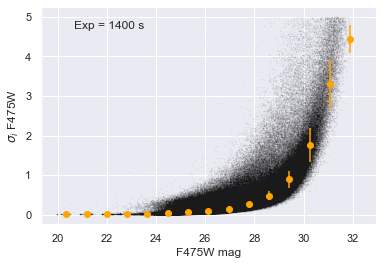

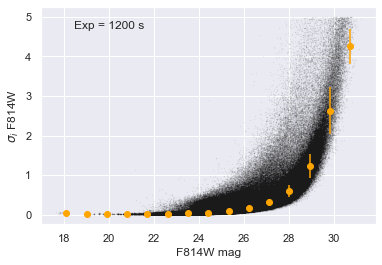

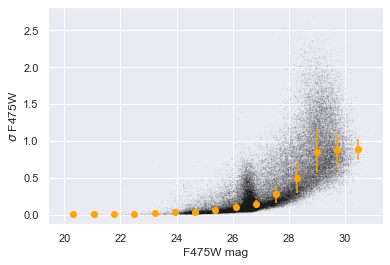

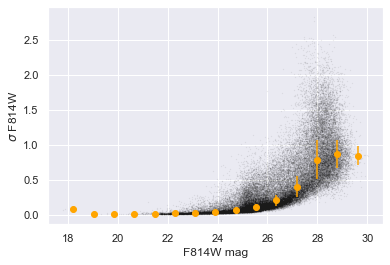

In [11]:
error_key, error_array, scatter_array = dp.get_properties('vv124', 14, filters=['F475W', 'F814W'], exptimes=[1400,1200])

In [7]:
mean_std = np.interp(25.55, scatter_array[0,:,0], scatter_array[0,:,1])
std_std = np.interp(25.55, scatter_array[0,:,0], scatter_array[0,:,2])
print('Typical scatter for RRL in F475W: {:.3f} +- {:.3f}, S/N = {:3.0f}'.format(mean_std, std_std, 1/mean_std))

mean_std = np.interp(24.95, scatter_array[1,:,0], scatter_array[1,:,1])
std_std = np.interp(24.95, scatter_array[1,:,0], scatter_array[1,:,2])
print('Typical scatter for RRL in F814W: {:.3f} +- {:.3f}, S/N = {:3.0f}'.format(mean_std, std_std, 1/mean_std))


Typical scatter for RRL in F475W: 0.073 +- 0.030, S/N =  14
Typical scatter for RRL in F814W: 0.080 +- 0.031, S/N =  12


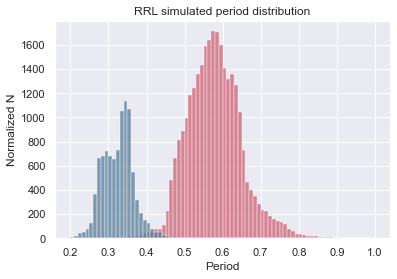

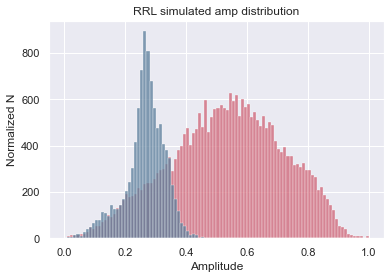

In [8]:
ogle4_dir = '/Users/jill/Research/Surveys/OGLE/OGLEIV/LMC/'


# LMC distribution of RR Lyrae stars
period_bins_c, fo_period_prob, fu_period_prob = vs.get_period_distribution('RRL', ogle4_dir)
amp_bins_c, fo_amp_prob, fu_amp_prob = vs.get_amp_distribution('RRL', ogle4_dir)

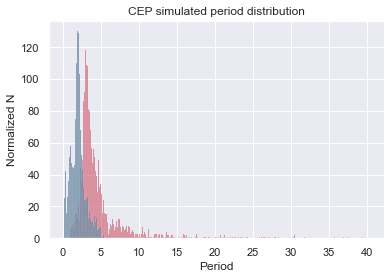

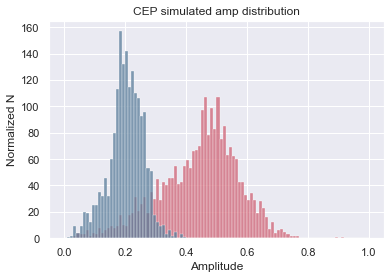

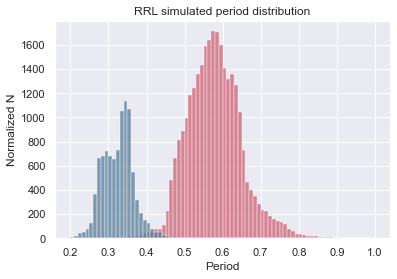

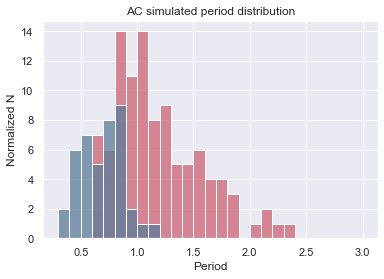

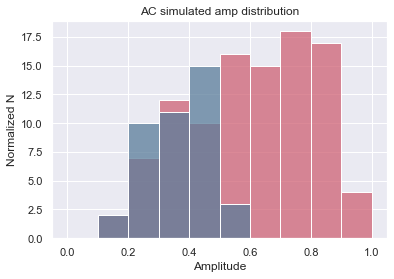

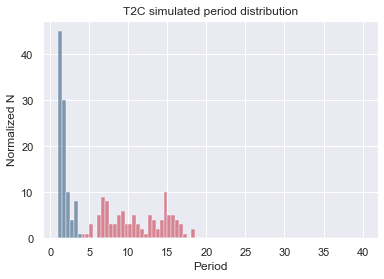

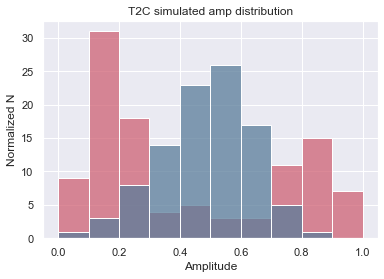

800
[(  1, 'CEP', 'FO',  3.70000914, 14.51722108, 0.16830128)
 ( 26, 'CEP', 'FO',  4.62056331, 14.09197949, 0.2251918 )
 ( 51, 'CEP', 'FO',  1.78141146, 15.32959761, 0.12124028)
 ( 76, 'CEP', 'FO',  2.0276118 , 15.20561139, 0.21904877)
 (101, 'CEP', 'FU',  4.73841843, 14.73476388, 0.49769062)
 (126, 'CEP', 'FU',  1.72956005, 15.78265216, 0.48220846)
 (151, 'CEP', 'FU',  4.59853342, 14.82621764, 0.53294388)
 (176, 'CEP', 'FU',  4.4463455 , 14.74218243, 0.33431219)
 (201, 'RRL', 'FO',  0.28367676, 18.71766929, 0.2416262 )
 (226, 'RRL', 'FO',  0.28759825, 18.68524785, 0.25976271)
 (251, 'RRL', 'FO',  0.3329493 , 18.90606489, 0.32539129)
 (276, 'RRL', 'FO',  0.39758407, 18.59984898, 0.33182957)
 (301, 'RRL', 'FU',  0.49215957, 18.67217756, 0.81761485)
 (326, 'RRL', 'FU',  0.5853419 , 18.59957999, 0.77253274)
 (351, 'RRL', 'FU',  0.51552721, 18.51602025, 0.73483959)
 (376, 'RRL', 'FU',  0.48821524, 18.79621258, 0.70128443)
 (401, 'AC', 'FO',  0.92053119, 16.78287106, 0.45307376)
 (426, 'AC'

In [9]:
sim_data = vs.simulate_params(['CEP', 'RRL', 'AC', 'T2C'], 100, ogle4_dir)
print(len(sim_data['id']))
print(sim_data[0:-1:25])

In [12]:
output_dir = 'simulations/lcvs/'
distance = 25.8

#filters = np.array(['B', 'I'])
filters1 = np.repeat('B', 14)
filters2 = np.repeat('I', 14)
filters = np.append(filters1, filters2)

error_key['filter'][error_key['filter'] == 'F475W'] = 'B'
error_key['filter'][error_key['filter'] == 'F814W'] = 'I'

mjds = np.array([58490.640099000, 58490.838859000, 58491.771357000, 58491.847075000, 58492.427560000,
                58492.504885000, 58492.824905000, 58492.906455000, 58495.803519000, 58495.885266000,
                58496.332749000, 58496.414009000, 58496.531369000, 58496.612676000, 58490.657217000,
                58490.855977000, 58491.782763000, 58491.823596000, 58492.444678000, 58492.487119000, 
                58492.842023000, 58492.888689000, 58495.820637000, 58495.867500000, 58496.349867000,
                58496.396243000, 58496.548487000, 58496.594910000])

exptimes1 = np.repeat(1400, 14)
exptimes2 = np.repeat(1200, 14)
exptimes = np.append(exptimes1, exptimes2)

print(error_key)
print(exptimes)

vs.make_simulated_lcv(sim_data, mjds, filters, 
    exptimes, distance, scatter_array, error_key, error_array, 
    output_dir, append=False, period_search_range=[0.3, 6.0], rrl_cutoff=25.3)

[('B', 1400.) ('I', 1200.)]
[1400 1400 1400 1400 1400 1400 1400 1400 1400 1400 1400 1400 1400 1400
 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200 1200]
['B' 'I']
[22.91561209 21.84022108]


[0, 1, 102, 103]


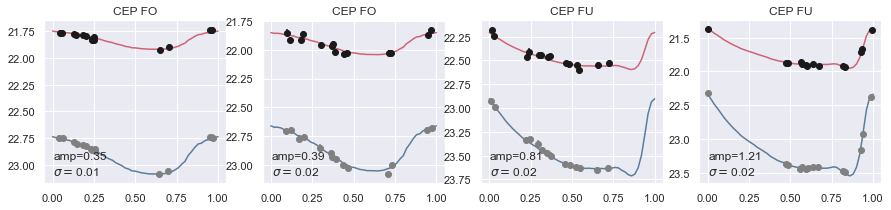

[200, 201, 302, 303]


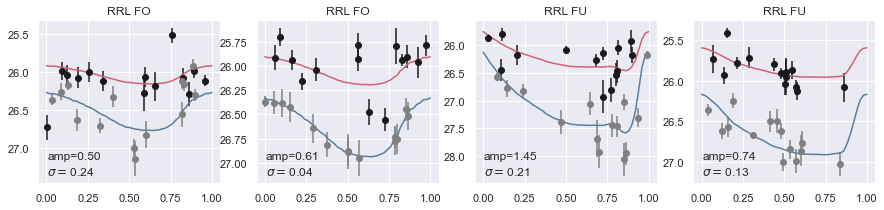

[400, 401, 502, 503]


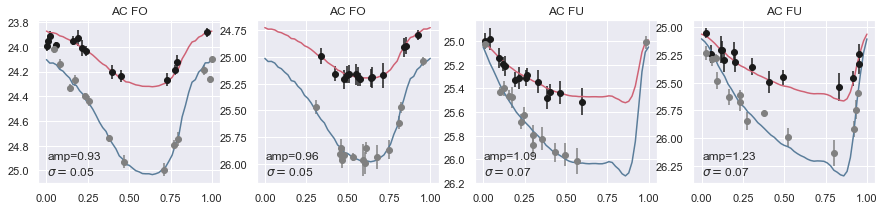

[600, 601, 702, 703]


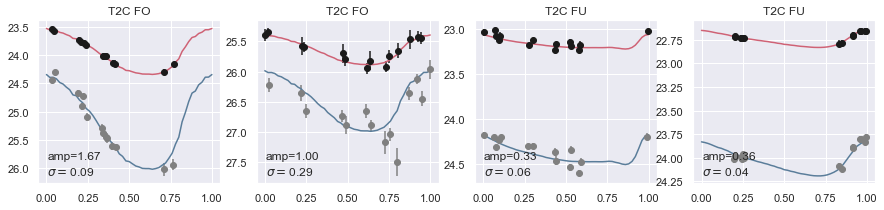

In [16]:
# read parameter file 
dt = np.dtype([('id', int), ('type', 'U3'), ('mode', 'U2'), ('template', int), ('period', float), 
              ('t0', float), ('mag1', float), ('amp1', float), ('sig1', float), ('mag2', float), 
              ('amp2', float), ('sig2', float)])
data = np.loadtxt('simulations/lcvs/true_params.txt', dtype=dt)

# Get template light curves
template_file = '../../var_templates.txt'
dt = np.dtype([('phase', float), ('ab1', float), ('ab2', float),
        ('ab3', float), ('ab4', float), ('ab5', float), ('ab6', float),
        ('c', float), ('ab7', float), ('ab8', float)])
templates = np.loadtxt(template_file, dtype=dt)
templates_new = np.c_[templates['ab1'], templates['ab2'], templates['ab3'],
        templates['ab4'], templates['ab5'], templates['ab6'], templates['c'],
        templates['ab7'], templates['ab8']]
templates_mean = np.mean(templates_new, axis=0)


for i in range(4): 
    
    var_types = ['CEP FO', 'CEP FU', 'RRL FO', 'RRL FU']
    n = 100
    star_indices = [n*2*i, n*2*i+1, n*(2*i+1)+2, n*(2*i+1)+3]
    print(star_indices)
    
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    
    for j in range(len(star_indices)):
        xx = star_indices[j]
        t = data['template'][xx]
        mag_temp1 = (templates_new[:,t]-templates_mean[t])*data['amp1'][xx] + data['mag1'][xx]
        ax[j].plot(templates['phase'], mag_temp1, color='xkcd:steel blue')
        mag_temp2 = (templates_new[:,t]-templates_mean[t])*data['amp2'][xx] + data['mag2'][xx]
        ax[j].plot(templates['phase'], mag_temp2, color='xkcd:rose')
        ax[j].set_title('{} {}'.format(data['type'][xx], data['mode'][xx]))
        #ax[j].set_title(var_types[j])
        ax[j].invert_yaxis()
        
        # read in lcv data 
        dt = np.dtype([('filter', int), ('mjd', float), ('mag', float), ('err', float)])
        lcv = np.loadtxt('simulations/lcvs/sim_{}.fitlc'.format(xx+1), dtype=dt, skiprows=3)
        ph = np.mod((lcv['mjd']-data['t0'][xx])/data['period'][xx], 1)
        f1 = lcv['filter'] == 1
        ax[j].errorbar(ph[f1], lcv['mag'][f1], yerr=lcv['err'][f1], fmt='o', color='k')
        f2 = lcv['filter'] == 0
        ax[j].errorbar(ph[f2], lcv['mag'][f2], yerr=lcv['err'][f2], fmt='o', color='gray')
        
        ax[j].text(0.05, 0.15, 'amp={:.2f}'.format(data['amp1'][xx]), transform=ax[j].transAxes)
        ax[j].text(0.05, 0.05, '$\sigma=${:.2f}'.format(data['sig1'][xx]), transform=ax[j].transAxes)
        
    plt.show()